In [1]:
# First we need to import all the necessary toolboxes...
from scipy.optimize import fsolve 
from scipy.interpolate import interp1d
# import all the standard math functions and plotting stuff we'd want from numpy and matplotlib
from numpy import*
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline 
import pandas as pd

# Chapter 8: Convective flow around a chimney stack
Determine the effect of ambient air wind velocity on the temperature at which oven gases are discharged from a stack. Assume the exhasut gas flow rate is 0.5 kg/s and the $T_{m,in}$ = 577 $^o$C (850 K). Assume the ambient air temperature is 27 $^o$C (300 K) and flows at 5 m/s.

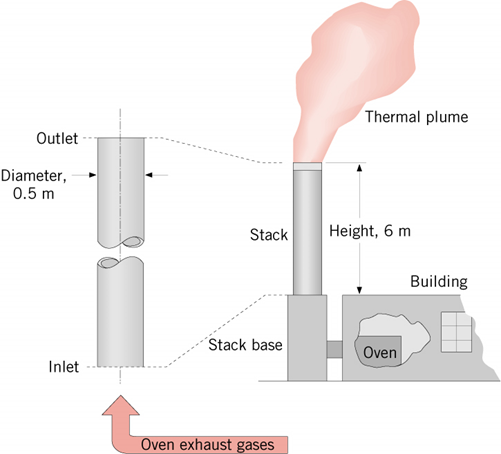

### Assumptions:
- stead state
- negligible wall thermal resistance (ok for "thin", metal pipe)
- exhaust gas is air (for determining properties)
- ideal gas
- fully developed flow
- constant properties

### Analysis:
##### Gas properties
First we need to find the gas properties (i.e., air outside the stack and exhaust gas inside the stack). For this we'll need to make some guesses...

* External: 
For the external air, we'll need the film temp between the average stack surface temp and the ambient air temp. The simplest is to assume an average stack surface temp of $\frac{850 K + 300 K}{2}=550 K$, which yields an average film temperature of $\frac{550 K + 300 K}{2}=450 K=T_{f,o}$

* Internal:
For the exhaust gas inside the stack, let's assume that this gas doesn't cool off that much and exits the top at 750 K, so our average $T_m$ guess is 800 K.


##### Stack Temps
Next we can recognize this is a version of a constant surfact temperature problem, but instead of $T_s$ being constant, we have a constant $T_\infty$. So the resistor network for this problem looks like this:

$$
R''_{tot} = \frac{1}{\bar{U}} = \frac{1}{\frac{1}{\bar{h}_i} + \frac{1}{\bar{h}_o}}
$$

...note here we have assumed a "thin"/metal pipe, which allows us to neglect the conduction resistance through the wall of the stack and further assumes that inner and outer radius of the stack are very neary the same.

##### Finding "h" values
At this point we'll need to determine the inner and outer convection coefficients:

* External: 
$\bar{Nu}_D = \frac{\bar{h}_o D}{k_{air}}$ can be found from either the Hilpert or Churchill-Bernstein corellations.

* Internal:
$\bar{Nu}_D = \frac{\bar{h}_i D}{k_{stack}}$ can be found from either the Diggus-Boelter or Gnielinski corellations.

##### Temperature Profile
The temperature profile for internal flow conditions such as this one (i.e., constant $T_\infty$, is given by Eqn 8.45:

$$
T_{m}(x) = T_\infty - \left(T_\infty - T_{m,i}\right)\exp\left[\frac{-\bar{U}P}{\dot{m}C_p}x\right]
$$

To find $T_s$, we can use an energy balance at any point (x), setting the $q_{out,inside}$ = $q_{out,outside}$:

$$
\bar{h}_o \left(T_s(x) - T_\infty\right) = \bar{h}_i \left(T_m(x) - T_s(x)\right)
$$

...and solving for $T_s(x)$ yields:

$$
T_s(x) = \frac{\bar{h}_o T_\infty + \bar{h}_i T_m(x)}{\bar{h}_o + \bar{h}_i}
$$

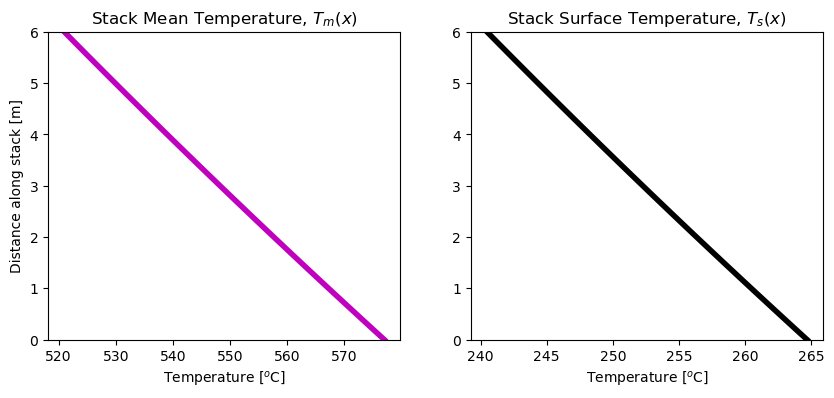

Note that here T_m,o = 521C and T_s,o = 240C


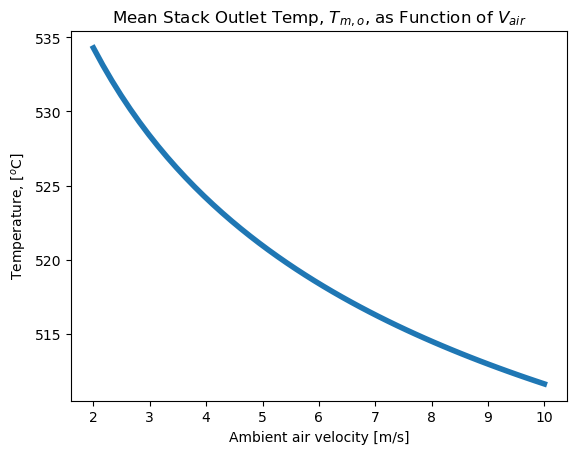

In [2]:
# Stack Properties
z = 6  # [m] tall stack
D = 0.5  # [m] diameter stack
P = pi*D  # [m] perimeter
Ac = pi*D**2/4  # [m2] cross-sectional area of stack

# External Air Properties
Tinf = 300  # [K]
Ts = 550  # [K] guess
Tf = (Tinf + Ts)/2  # [K] film temperature

rho_f = 0.7740
cp_f = 1021
mu_f = 250.7e-7
k_f = 37.3e-3
Pr_f = 0.686

Vinf = 5  # [m/s] ... note that this will change Re and thus some
          # constants in the Nu correlation (e.g. Hilpert)

Re_a = rho_f*Vinf*D/mu_f

# Hilpert Correlation Constants (Eq 7.52)
C1 = 0.683
m1 = 0.466
C2 = 0.193
m2 = 0.618

h_o = k_f/D * C2 * Re_a**(m2) * Pr_f**(1/3)  # [W/m2K] external h

# Stack Properties
# assume temp drops by 100C so guess Tm,o = 750K and get properties at 800K
Tmi = 850  # [K]
ms = 0.5  # [kg/s] mass flow rate through stack

rho_s = 0.4354
cp_s = 1009
mu_s = 369.8e-7
k_s = 57.3e-3
Pr_s = 0.709

Vs = ms/(rho_s*Ac)  # [m/s] stack velocity
Re_s = rho_s*Vs*D/mu_s

# Dittus-Boelter (Eq 8.60) for cooling, n=0.3
h_i = k_s/D * 0.023*Re_s**(4/5)*Pr_s**(0.3)  # [W/m2K]

# Overall heat transfer coefficient
U = 1 / (1/h_o + 1/h_i)  # [W/m2K]

# Temperature profile along tube
x = linspace(0,z)  # [m]
Tm = Tinf - (Tinf - Tmi)*exp(-U*P*x/(ms*cp_s)) - 273  # [C]
Ts = (h_o*(Tinf-273) + h_i*Tm)/(h_o+h_i)  # [C]

# # Plotting temp along stack for both mean and surface temps 
# plt.figure(1)
# plt.plot(Tm, x, linewidth=4)  # plots Stack Temp
# plt.plot(Ts, x, linewidth=4)  # plots Stack Surface Temp
# plt.title('Stack Temperature')
# plt.ylabel('Distance along stack [m]')
# plt.xlabel('Temperature [°C]')
# plt.ylim([0, z])
# plt.show()

# Plotting temp along stack for both mean and surface temps 
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].plot(Tm, x, '-m', linewidth=4) #plots Stack Temp
axs[0].set_title('Stack Mean Temperature, $T_m(x)$')
axs[0].set_ylabel('Distance along stack [m]')
axs[0].set_xlabel('Temperature [$^o$C]')
axs[0].set_ylim([0,z])
#
axs[1].plot(Ts, x, 'k', linewidth=4) #plots Stack Surface Temp
axs[1].set_title('Stack Surface Temperature, $T_s(x)$')
axs[1].set_xlabel('Temperature [$^o$C]')
axs[1].set_ylim([0,z])
plt.show()

# Annotation box showing detail on solution point
print(f'Note that here T_m,o = 521C and T_s,o = 240C')

# If Vinf changes
VV = linspace(2, 10)
Rea = rho_f * VV * D / mu_f
h_o = k_f / D * C2 * Rea**(m2) * Pr_f**(1/3)  # [W/m2K] external h
UU = 1 / (1/h_o + 1/h_i)  # [W/m2K]
Tmo = Tinf - (Tinf - Tmi) * exp(-UU * P * x[-1] / (ms * cp_s)) - 273  # [C]

# Plotting stack exit temp vs. ambient air velocity
fig2, ax2 = plt.subplots()
ax2.plot(VV, Tmo, linewidth=4)
ax2.set_title('Mean Stack Outlet Temp, $T_{m,o}$, as Function of $V_{air}$')
ax2.set_xlabel('Ambient air velocity [m/s]')
ax2.set_ylabel('Temperature, [$^o$C]')
plt.show()